In [1]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
LV_df = pd.read_csv("LVMUY.csv")
LV_df['True_Label']=LV_df["Return"].apply(lambda x : '+' if x >= 0 else '-')
LV_df["delta_diff"] = LV_df.Close - LV_df.Open
LV_df = LV_df[LV_df.Year > 2014]
LV_df

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True_Label,delta_diff
252,2015-01-02,2015,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2015-00,33.90,34.20,33.57,33.73,63100.0,26.30,-0.020616,26.744286,26.6168,-,-0.17
253,2015-01-05,2015,1,5,<bound method PandasDelegate._add_delegate_acc...,1,2015-01,33.80,33.80,32.75,32.87,109000.0,25.63,-0.025497,26.684286,26.6380,-,-0.93
254,2015-01-06,2015,1,6,<bound method PandasDelegate._add_delegate_acc...,1,2015-01,32.95,33.03,32.30,32.42,51400.0,25.28,-0.013690,26.630714,26.6448,-,-0.53
255,2015-01-07,2015,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2015-01,32.13,32.40,32.00,32.30,91300.0,25.19,-0.003701,26.592143,26.6456,-,0.17
256,2015-01-08,2015,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2015-01,32.60,33.30,32.51,32.88,93100.0,25.64,0.017957,26.541429,26.6554,+,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,2019,12,24,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,91.90,91.90,91.47,91.53,51600.0,87.42,-0.002072,85.540714,83.5206,-,-0.37
1506,2019-12-26,2019,12,26,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,92.06,92.73,91.54,92.26,57600.0,88.12,0.007976,85.825000,83.6842,+,0.20
1507,2019-12-27,2019,12,27,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,93.12,93.59,93.02,93.31,99300.0,89.12,0.011381,86.146429,83.8778,+,0.19
1508,2019-12-30,2019,12,30,<bound method PandasDelegate._add_delegate_acc...,52,2019-52,93.40,93.40,92.74,93.07,59500.0,88.89,-0.002572,86.490714,84.0656,-,-0.33


### "buy-and-hold" strategies

In [3]:
#For buy and hold, you buy on the first day of 2018 and sell on the last day of 2019
LV_BnH = LV_df[LV_df.Year >= 2018]
LV_BnH['invest_bnh'] = (LV_BnH['Return']+1).cumprod()-1

D:\TEMP/ipykernel_14264/3140144809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LV_BnH['invest_bnh'] = (LV_BnH['Return']+1).cumprod()-1


<Figure size 432x288 with 0 Axes>

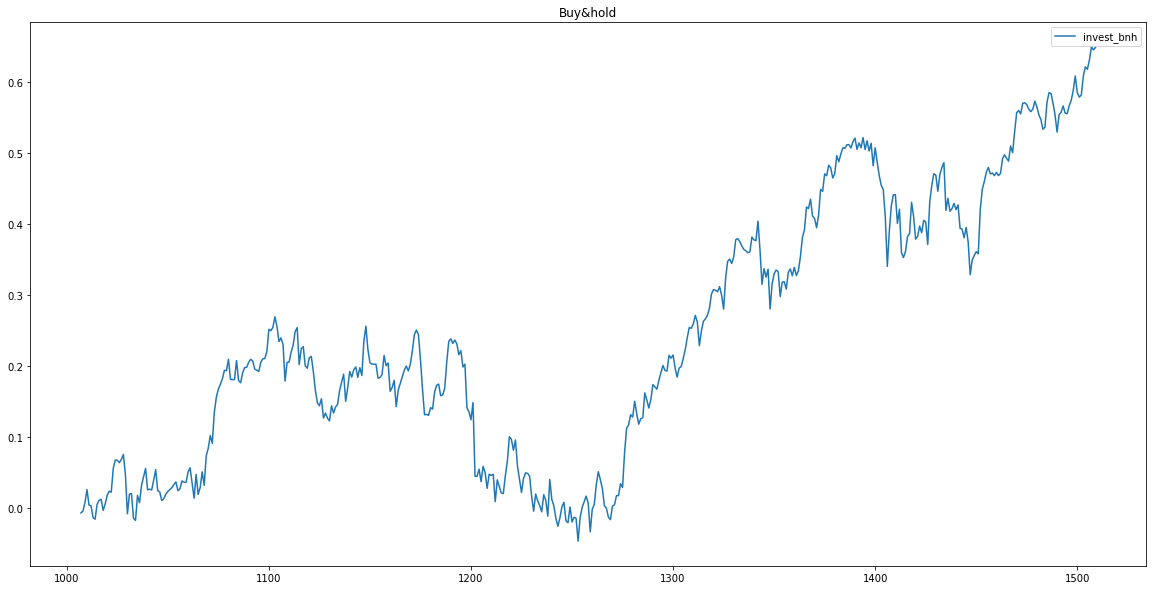

In [4]:
fig = plt.figure()
ax1 = LV_BnH[['invest_bnh']].plot(kind='line', title ="Buy&hold",figsize=(20,10))
plt.show()

### True Label

In [5]:
LV_grouped = LV_df.groupby(['Year', 'Week_Number'])['Return'].agg([np.sum])
LV_grouped.reset_index(['Year', 'Week_Number'], inplace=True)
LV_grouped['Year_Week_Number'] = LV_grouped['Year'].astype(str) + LV_grouped['Week_Number'].astype(str)
LV_grouped.rename(columns={'sum': 'Weekly_Return'}, inplace=True)
LV_grouped['Label']=LV_grouped["Weekly_Return"].apply(lambda x : '1' if x >= 0 else '0')
LV_grouped.dropna(inplace=True)
LV_grouped

,Year,Week_Number,Weekly_Return,Year_Week_Number,Label
0,2015,0,-0.020616,20150,0
1,2015,1,-0.031319,20151,0
2,2015,2,0.046411,20152,1
3,2015,3,0.027899,20153,1
4,2015,4,0.016583,20154,1
...,...,...,...,...,...
258,2019,48,-0.002156,201948,0
259,2019,49,0.013886,201949,1
260,2019,50,0.013283,201950,1
261,2019,51,0.025197,201951,1


In [6]:
LV_df['invest_label'] = LV_df.apply(lambda x: x['Close'] / x['Open'], axis=1) * 100 
LV_label = LV_df.groupby(['Year', 'Week_Number'])['invest_label'].agg([np.mean])
LV_label.reset_index(['Year', 'Week_Number'], inplace=True)
LV_label.rename(columns={'mean': 'invest_label'}, inplace=True)
LV_label = LV_label.merge(LV_grouped, on=['Year', 'Week_Number'], how = 'inner')
LV_label = LV_label[LV_label.Year >= 2018]

LV_label_green = LV_label[LV_label.Label == '1']
LV_label_green

,Year,Week_Number,invest_label,Weekly_Return,Year_Week_Number,Label
157,2018,0,100.286055,0.025167,20180,1
159,2018,2,99.848642,0.000688,20182,1
160,2018,3,100.397126,0.060557,20183,1
163,2018,6,101.360738,0.073229,20186,1
166,2018,9,100.340271,0.019708,20189,1
...,...,...,...,...,...,...
255,2019,45,100.111461,0.001495,201945,1
257,2019,47,100.322505,0.022174,201947,1
259,2019,49,100.286793,0.013886,201949,1
260,2019,50,99.938002,0.013283,201950,1


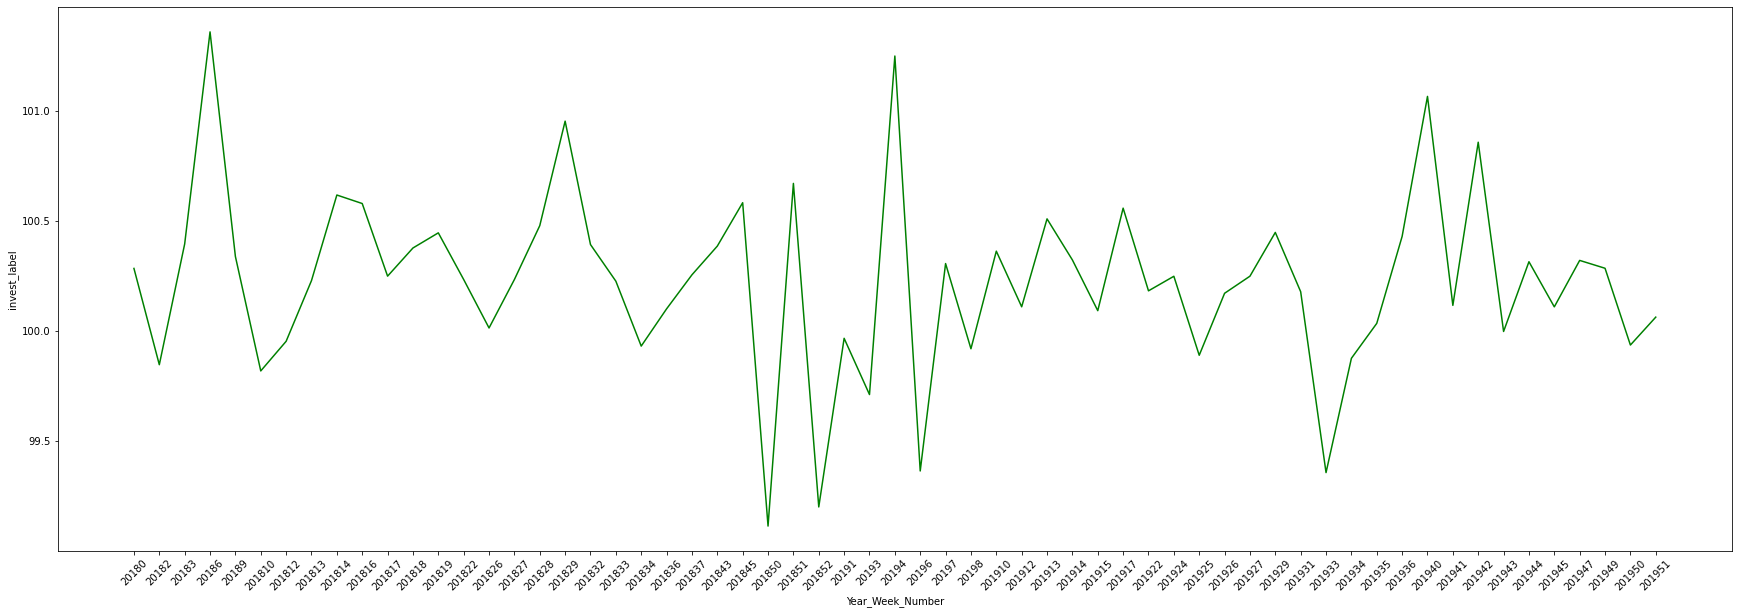

In [7]:
plt.figure(figsize = (30,10))
ax = sns.lineplot(data=LV_label_green,x='Year_Week_Number', y = "invest_label",color = 'green')
ax.tick_params(axis='x',labelsize=10)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

### knn 

In [8]:
#parameter 1 
#1 find the mean delta difference for each week in each year
#2 subtract the mean from each delta difference in that week
#3 square each of the differences and sum them up
#4 divide the square by the number of days in that week
#5 take the square root
parameter1 = LV_df.groupby(['Year', 'Week_Number'])['delta_diff'].apply(lambda x: np.sqrt(np.sum(np.square(x - np.mean(x)))/len(x))).to_frame()
parameter1.reset_index(['Year', 'Week_Number'], inplace=True)
parameter1.rename(columns={'delta_diff': 'parameter1'}, inplace=True)
parameter1

,Year,Week_Number,parameter1
0,2015,0,0.000000
1,2015,1,0.453034
2,2015,2,0.389841
3,2015,3,0.138090
4,2015,4,0.333670
...,...,...,...
258,2019,48,0.529279
259,2019,49,0.453405
260,2019,50,0.508661
261,2019,51,0.248495


In [9]:
#parameter2
#the sd of the week in delta difference
parameter2 = LV_df.groupby(["Year", "Week_Number"]).agg("delta_diff").std().to_frame()
parameter2.reset_index(['Year', 'Week_Number'], inplace=True)
parameter2.rename(columns={'delta_diff': 'parameter2'}, inplace=True)
parameter2

,Year,Week_Number,parameter2
0,2015,0,NaN
1,2015,1,0.506508
2,2015,2,0.435855
3,2015,3,0.159452
4,2015,4,0.373055
...,...,...,...
258,2019,48,0.591752
259,2019,49,0.506922
260,2019,50,0.568700
261,2019,51,0.286938


In [10]:
LV_knn = parameter2.copy()
LV_knn['parameter1']=parameter1['parameter1']
LV_knn = LV_knn.merge(LV_grouped, on=['Year', 'Week_Number'], how = 'inner')
LV_knn.dropna(inplace=True)
LV_knn

,Year,Week_Number,parameter2,parameter1,Weekly_Return,Year_Week_Number,Label
1,2015,1,0.506508,0.453034,-0.031319,20151,0
2,2015,2,0.435855,0.389841,0.046411,20152,1
3,2015,3,0.159452,0.138090,0.027899,20153,1
4,2015,4,0.373055,0.333670,0.016583,20154,1
5,2015,5,0.628029,0.561726,0.062366,20155,1
...,...,...,...,...,...,...,...
258,2019,48,0.591752,0.529279,-0.002156,201948,0
259,2019,49,0.506922,0.453405,0.013886,201949,1
260,2019,50,0.568700,0.508661,0.013283,201950,1
261,2019,51,0.286938,0.248495,0.025197,201951,1


In [11]:
from sklearn.neighbors import KNeighborsClassifier
LV_training = LV_knn[LV_knn.Year <= 2017] 
LV_testing = LV_knn[LV_knn.Year >= 2018]

X_train = LV_training[['parameter1','parameter2']].values
X_test = LV_testing[['parameter1','parameter2']].values
y_train = LV_training['Label'].values
y_test = LV_testing['Label'].values

In [12]:
#p=1
knn_classifier = KNeighborsClassifier(n_neighbors = 3, p=1, metric="minkowski")
knn_classifier.fit(X_train, y_train)
prediction_test = knn_classifier.predict(X_test)

In [13]:
LV_knn_pre = LV_knn.copy()
LV_knn_pre = LV_knn_pre[LV_knn_pre.Year >= 2018]

In [14]:
LV_knn_pre['pre_label'] = prediction_test
LV_knn_pre['invest_label'] = LV_label['invest_label']
LV_knn_pre_green = LV_knn_pre[LV_knn_pre.pre_label == '1']

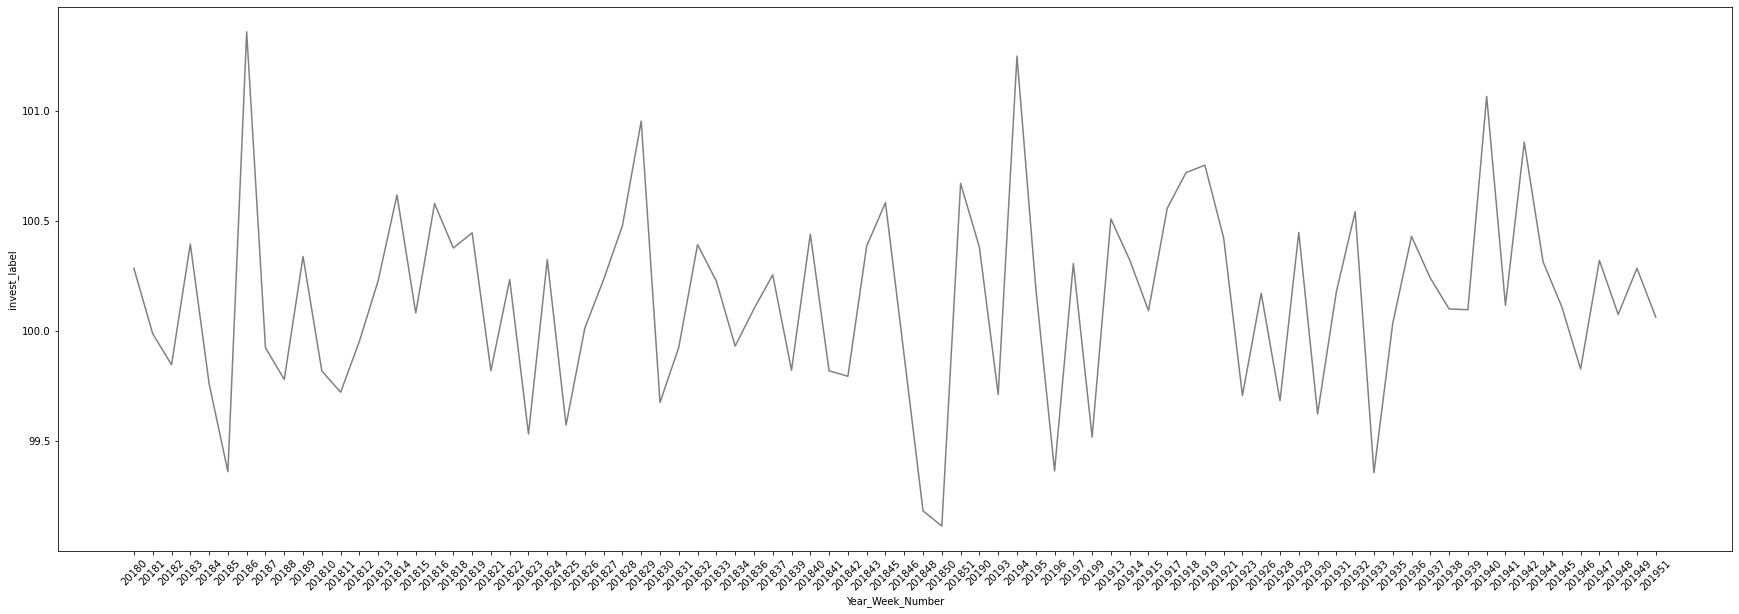

In [15]:
plt.figure(figsize = (30,10))
ax = sns.lineplot(data=LV_knn_pre_green,x='Year_Week_Number', y = "invest_label",color = 'gray')
ax.tick_params(axis='x',labelsize=10)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In [16]:
#p = 1.5
knn_classifier = KNeighborsClassifier(n_neighbors = 3, p=1.5, metric="minkowski")
knn_classifier.fit(X_train, y_train)
prediction_test = knn_classifier.predict(X_test)

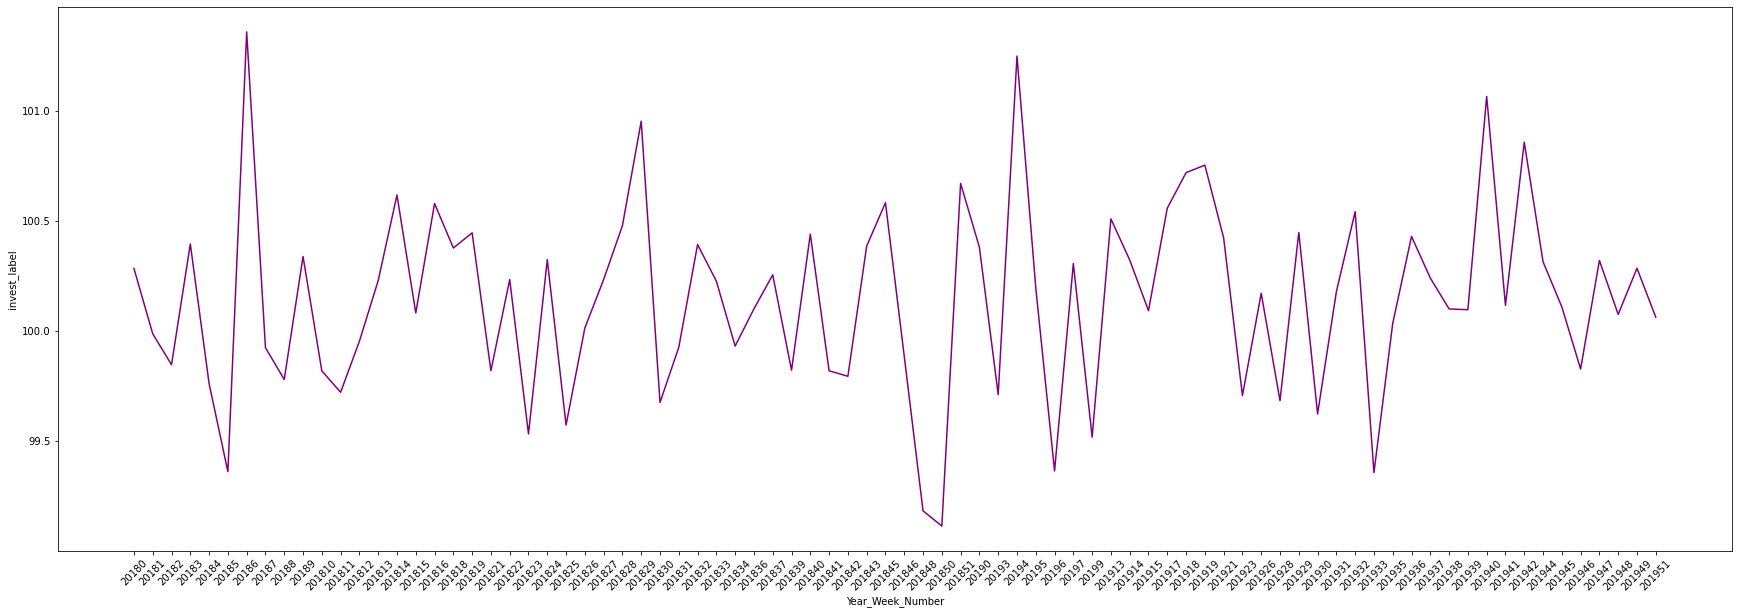

In [17]:
LV_knn_pre = LV_knn.copy()
LV_knn_pre = LV_knn_pre[LV_knn_pre.Year >= 2018]
LV_knn_pre = LV_knn.copy()
LV_knn_pre = LV_knn_pre[LV_knn_pre.Year >= 2018]
plt.figure(figsize = (30,10))
ax = sns.lineplot(data=LV_knn_pre_green,x='Year_Week_Number', y = "invest_label",color = 'purple')
ax.tick_params(axis='x',labelsize=10)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

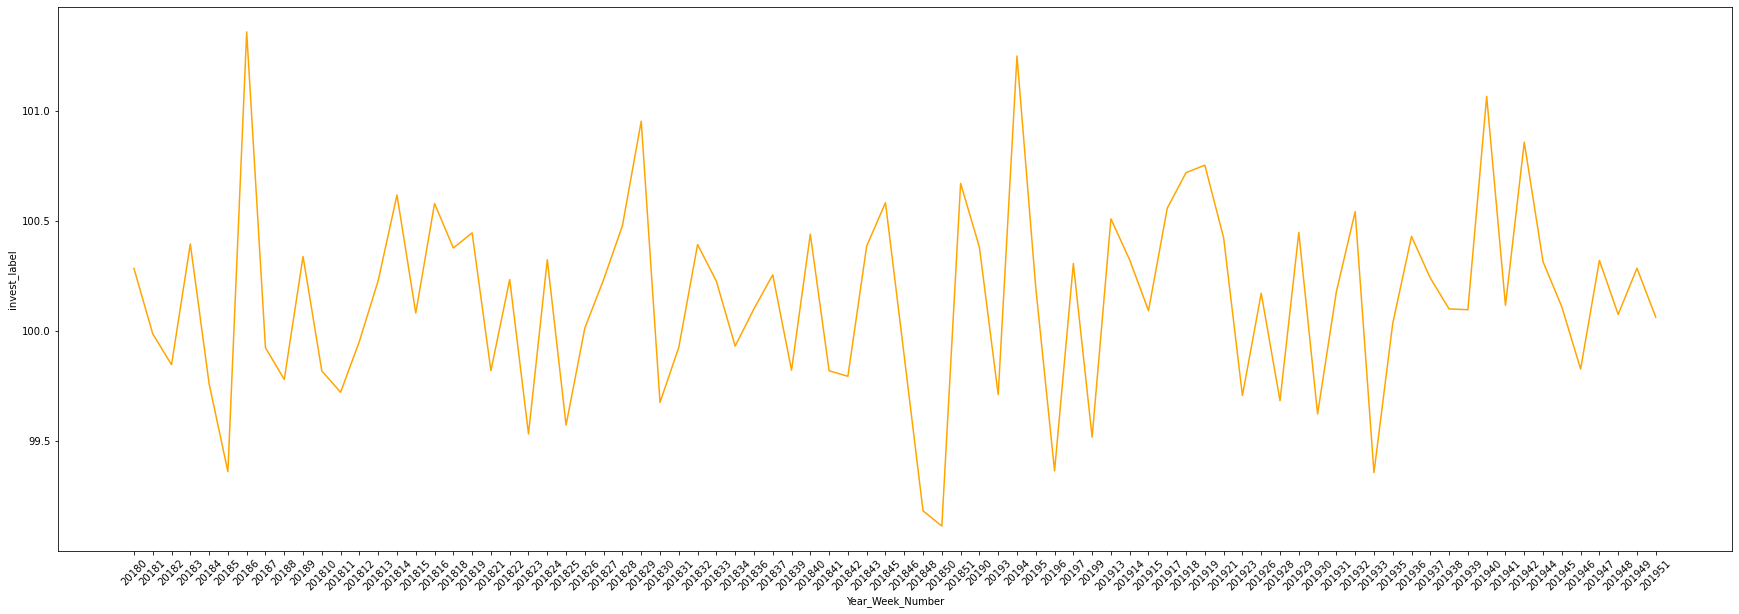

In [18]:
#p = 2
knn_classifier = KNeighborsClassifier(n_neighbors = 3, p=2, metric="minkowski")
knn_classifier.fit(X_train, y_train)
prediction_test = knn_classifier.predict(X_test)
LV_knn_pre = LV_knn.copy()
LV_knn_pre = LV_knn_pre[LV_knn_pre.Year >= 2018]
LV_knn_pre = LV_knn.copy()
LV_knn_pre = LV_knn_pre[LV_knn_pre.Year >= 2018]
plt.figure(figsize = (30,10))
ax = sns.lineplot(data=LV_knn_pre_green,x='Year_Week_Number', y = "invest_label",color = 'orange')
ax.tick_params(axis='x',labelsize=10)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()